<a href="https://colab.research.google.com/github/VedantMankar/Face-Expression-Detection/blob/master/Facial_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from zipfile import ZipFile
file_name ="face-expression-recognition-dataset.zip"

with ZipFile(file_name,'r') as Zip:
  Zip.extractall()
  print("Done")

Done


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install utils

In [0]:
!pip install livelossplot

Importing Libraries

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import MaxPooling2D,Activation,BatchNormalization
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
from IPython.display import SVG,Image
from livelossplot import PlotLossesKerasTF

Exploring Dataset

In [0]:
for expression in os.listdir("/content/images/train/"):
    print(str(len(os.listdir("./images/train/" + expression))) +" "+ expression +" " + "images" )

7164 happy images
4982 neutral images
3993 angry images
436 disgust images
3205 surprise images
4103 fear images
4938 sad images


Generating Training and validation batches

In [0]:
img_size = 48 # Data from kaggle
batch_size = 64

#Training data
training_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip = True,rotation_range=0)
train_generator = training_datagen.flow_from_directory("/content/images/train",
                                                        target_size = (img_size,img_size),
                                                       batch_size = batch_size,
                                                       color_mode = 'grayscale',
                                                       class_mode = 'categorical',
                                                       shuffle=True)


Found 28821 images belonging to 7 classes.


In [0]:
#Validation Data
valid_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip = True,rotation_range=0)
valid_generator = valid_datagen.flow_from_directory("/content/images/validation",
                                                        target_size = (img_size,img_size),
                                                       batch_size = batch_size,
                                                       color_mode = 'grayscale',
                                                       class_mode = 'categorical',
                                                       shuffle=True)

Found 7066 images belonging to 7 classes.


Create Model

In [0]:

model = Sequential()
    
#1-Conv-layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
#2-Conv-layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
#3-Conv-layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
#4-Conv-layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
    
#Neural Network layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
    
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
    
model.add(Dense(7,activation='softmax'))
    
opt = Adam(lr=0.0005)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics = ['accuracy'])
model.summary()
    
    

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_24 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)      

Training and Evaluating Model

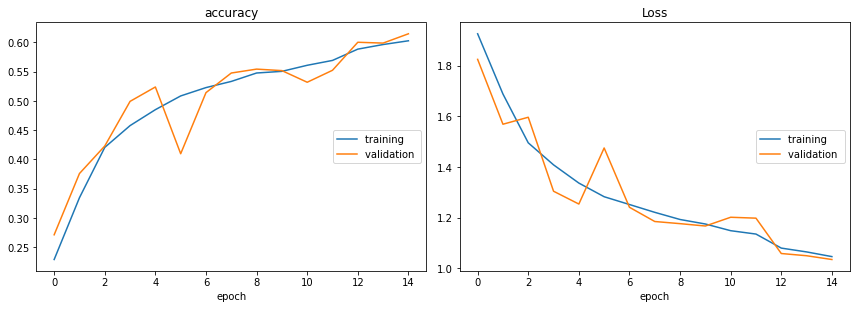

accuracy
	training         	 (min:    0.229, max:    0.603, cur:    0.603)
	validation       	 (min:    0.271, max:    0.615, cur:    0.615)
Loss
	training         	 (min:    1.046, max:    1.926, cur:    1.046)
	validation       	 (min:    1.034, max:    1.825, cur:    1.034)

Epoch 00015: saving model to ModelWeights.h5
450/450 [==============================] - 29s 64ms/step - loss: 1.0456 - accuracy: 0.6028 - val_loss: 1.0341 - val_accuracy: 0.6148 - lr: 1.0000e-04


In [0]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = valid_generator.n//valid_generator.batch_size

#creating checkpoints
checkpoints = ModelCheckpoint("ModelWeights.h5",monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)

#Reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.0001,mode='auto')

callbacks = [PlotLossesKerasTF(),checkpoints,reduce_lr]

history = model.fit(x = train_generator,
                   steps_per_epoch=steps_per_epoch,
                   epochs = epochs,
                   validation_data = valid_generator,
                   validation_steps = validation_steps,
                    callbacks = callbacks)


In [0]:
model_json = model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)